# GRIS inversions : on disk, active Sun (sunspot)

#### In this notebook we will perform similar analysis like earlier today, except we will be working with real data! 

#### The data we have here is obtained by the GRIS spectropolarimeter. It is a slit-based spectropolarimeter mounted at the GREGOR telescope. It is well-known for performing observations of He 10830 lines and neutral infrared iron lines that you might remember from an earlier school. 

#### We will first read and visualize data to see what we can expect, and then we will move on to the inversions! 

In [1]:
import hazel
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as plt 
import h5py

In [2]:
data = fits.open("straylight.29sep17.011.4d.fits")
data.info()

Filename: straylight.29sep17.011.4d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     946   (1010, 4, 250, 436)   float32   
  1                1 ImageHDU         9   (1010,)   float64   
  2                1 ImageHDU         9   (250, 436)   float32   


In [3]:
cube = fits.open("straylight.29sep17.011.4d.fits")[0].data
ll = fits.open("straylight.29sep17.011.4d.fits")[1].data

print (cube.shape)
print (ll.shape)

(436, 250, 4, 1010)
(1010,)


### So we have a datacube that is 436 x 250 x 4 x 1010 big and wavelength array that is 1010 long. So the dimensions correspond to: 

1010 - number of wavelength points 
4 - number of Stokes components 
436, 250 - physical dimensions 

### As always, we will start by plotting images at different wavelengths and examining the mean spectrum:

Text(0, 0.5, 'y [pixel]')

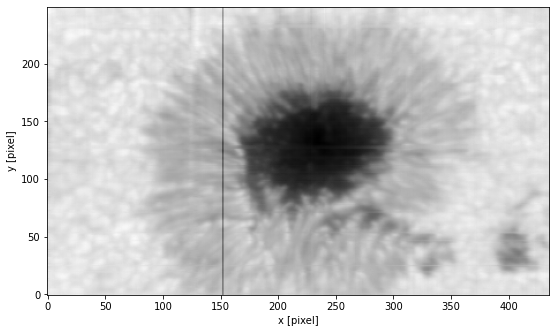

In [8]:
plt.figure(figsize=[9,6])
plt.imshow(cube[:,:,0,0].T,origin='lower',cmap='gray')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")

### This was a continuum image. What can you see there? 


### Good, now let's try and see how the image looks at 10830 wavelengths. To pick which wavelength we want to plot, let's look at the mean spectrum first: 

Text(0, 0.5, 'Intensity')

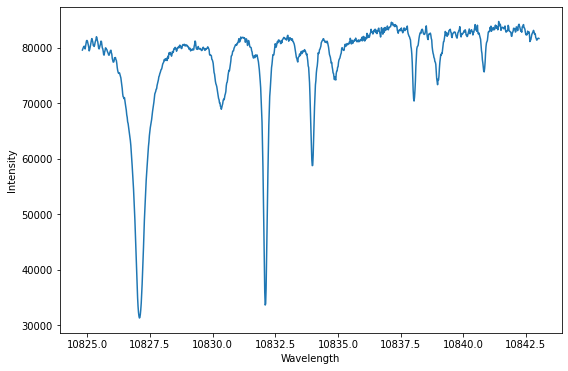

In [9]:
mean_spectrum = np.mean(cube[:,:,0,:],axis=(0,1))
plt.figure(figsize=[9,6])
plt.plot(ll,mean_spectrum)
plt.xlabel("Wavelength")
plt.ylabel("Intensity")

### There is a lot of spectral lines here! Do you know any of those? 

### Let's narrow it down to our line of interest. Let's also plot it without wavelengths on the x axis, to figure out indices we want to look at:

Text(0, 0.5, 'Intensity')

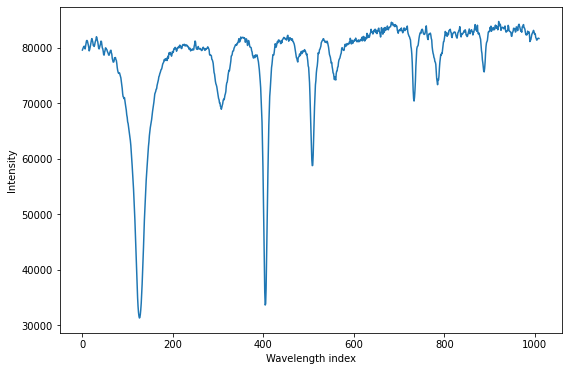

In [10]:
plt.figure(figsize=[9,6])
plt.plot(mean_spectrum)
plt.xlabel("Wavelength index")
plt.ylabel("Intensity")

### Ok looks like we should focus on the interval roughly between wavelength indices 230 and 370 

(220.0, 370.0)

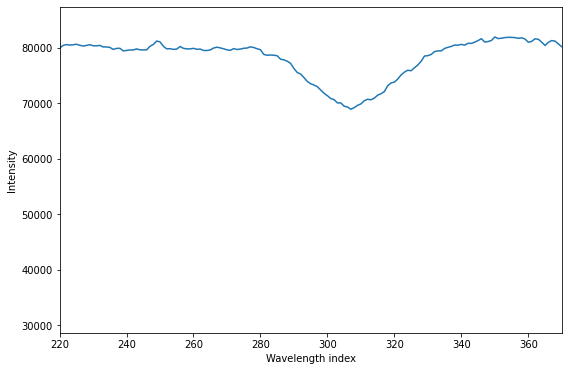

In [17]:
plt.figure(figsize=[9,6])
plt.plot(mean_spectrum)
plt.xlabel("Wavelength index")
plt.ylabel("Intensity")
plt.xlim([220,370])

### We see that the line is very weak. We also see it's minimum is around index 310. Let's plot the image at that wavelength:

Text(0, 0.5, 'y [pixel]')

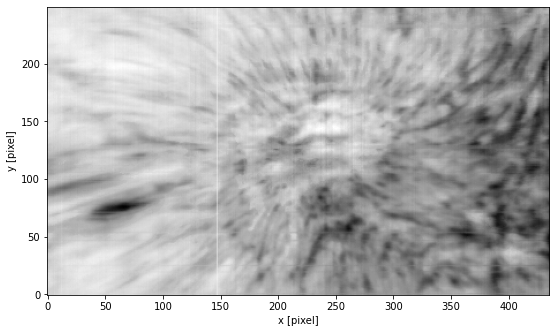

In [19]:
plt.figure(figsize=[9,6])
plt.imshow(cube[:,:,0,310].T/cube[:,:,0,240].T,origin='lower',cmap='gray')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")

### Not too different, why do you think this is? 

### Usuallyu we want to  calculate "integrated" strength of the He 10830 and make an image of that, let's do that now:

In [24]:
depth = (cube[:,:,0,240:370]/cube[:,:,0,240,None])
depth = np.sum(depth,axis=2)
depth.shape

(436, 250)

Text(0, 0.5, 'y [pixel]')

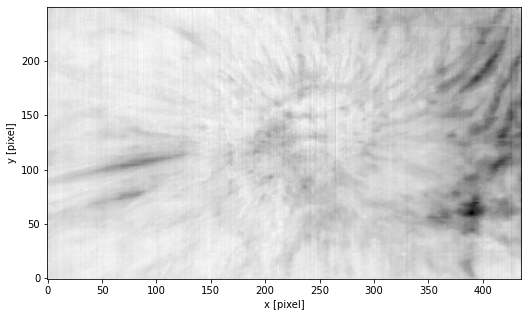

In [25]:
plt.figure(figsize=[10,5])
plt.imshow(depth.T,origin='lower',cmap='gray')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")

### Now this looks more interesting! Can we also improve this somehow? There are many interplays between the optical depth and velocity whicl will never allow us to see where there is the most He 10830. We can still try and play with it though...

## Now time to look at some example spectra! Let's look at a quite Sun, umbra and then penumbra:

In [27]:
# As we usually do, we will normalize the cube to mean quiet Sun continuum, to understand intensity values better
cube = cube / mean_spectrum[240]

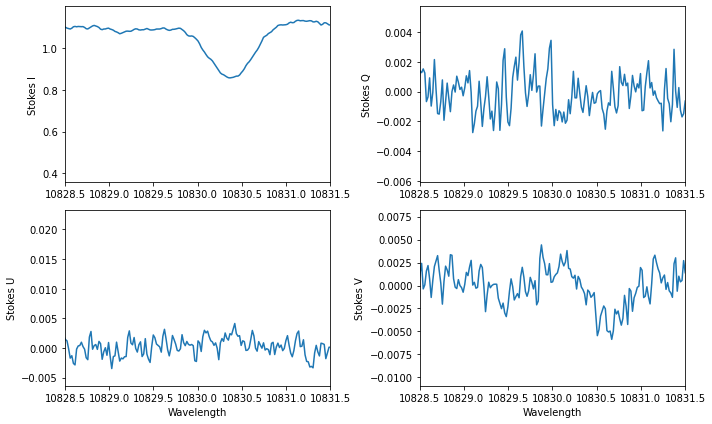

In [28]:
# quiet Sun 
i = 60
j = 70
ll_l = 10828.5
ll_r = 10831.5
plt.figure(figsize=[10,6])
plt.subplot(221)
plt.plot(ll,cube[i,j,0])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes I")
plt.subplot(222)
plt.plot(ll,cube[i,j,1])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes Q")
plt.subplot(223)
plt.plot(ll,cube[i,j,2])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes U")
plt.xlabel("Wavelength")
plt.subplot(224)
plt.plot(ll,cube[i,j,3])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes V")
plt.xlabel("Wavelength")
plt.tight_layout()

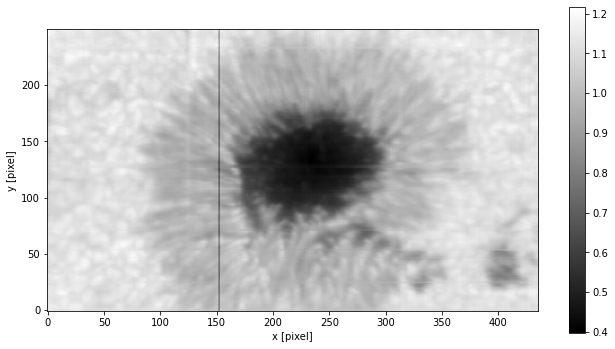

In [31]:
plt.figure(figsize=[11,6])
plt.imshow(cube[:,:,0,0].T,origin='lower',cmap='gray')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
plt.colorbar()

## Nothing very exciting, as we expected. Let's move on to penumbra:

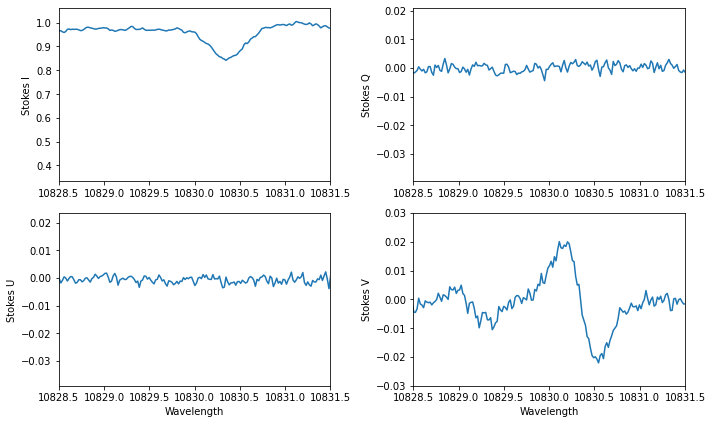

In [35]:
# Penumbra
i = 320
j = 150
ll_l = 10828.5
ll_r = 10831.5
plt.figure(figsize=[10,6])
plt.subplot(221)
plt.plot(ll,cube[i,j,0])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes I")
plt.subplot(222)
plt.plot(ll,cube[i,j,1])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes Q")
plt.subplot(223)
plt.plot(ll,cube[i,j,2])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes U")
plt.xlabel("Wavelength")
plt.subplot(224)
plt.plot(ll,cube[i,j,3])
plt.xlim([ll_l,ll_r])
plt.ylim([-0.03,0.03])
plt.ylabel("Stokes V")
plt.xlabel("Wavelength")
plt.tight_layout()

### What do you see here? A little bit more interesting, right? Ok, let's look at the umbra now. 

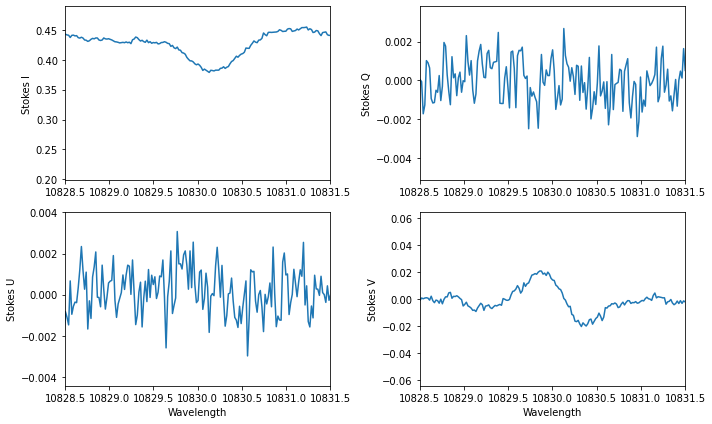

In [38]:
# Umbra
i = 230
j = 140
ll_l = 10828.5
ll_r = 10831.5
plt.figure(figsize=[10,6])
plt.subplot(221)
plt.plot(ll,cube[i,j,0])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes I")
plt.subplot(222)
plt.plot(ll,cube[i,j,1])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes Q")
plt.subplot(223)
plt.plot(ll,cube[i,j,2])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes U")
plt.xlabel("Wavelength")
plt.subplot(224)
plt.plot(ll,cube[i,j,3])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes V")
plt.xlabel("Wavelength")
plt.tight_layout()

### What can you conclude here? Any other interesting pixels you like. Have a look yourself! 

### (5-10 minutes free?)

# Inversion of individual pixels. 

## The process is the same as before. We pick up interesting pixels, "pack" the needed quantities in appopriate files, run the inversion and examine the results. Let's try with the lates one: Umbra pixel with strong vertical magnetic field:

In [53]:
l_l = 220
l_r = 370
n_wvl = l_r - l_l
i = 140
j = 110

# First the wavelength axis
np.savetxt('10830_gris.wavelength', ll[l_l:l_r], header='lambda')

# Then we will save something called, 'weigths', this will allow us to fine-tune the inversion if needed.
f = open('10830_gris.weights', 'w')
f.write('# WeightI WeightQ WeightU WeightV\n')
for i in range(n_wvl):
    f.write('1.0    1.0   1.0   1.0\n')
f.close()

# And finally, the 'observed' Stokes parameters:

f = open('10830_gris_stokes.1d', 'wb')
f.write(b'# LOS theta_LOS, phi_LOS, gamma_LOS\n')
f.write(b'0.0 0.0 0.0\n') # This should be identical to the above otherwise we will get inconsistent results. 
                            # this is something you should know from the observations
    
# Now, because Hazel uses local quiet Sun continuum, we need to additionally normalize our spectrum:
spectrum_to_fit = cube[i,j,:,l_l:l_r] / np.mean(cube[i,j,0,350:370])
noise_lvl = 3.5E-3 # In principle we should infer this from the observations:
f.write(b'\n')
f.write(b'# Boundary condition I/Ic(mu=1), Q/Ic(mu=1), U/Ic(mu=1), V/Ic(mu=1)\n')
f.write(b'1.0 0.0 0.0 0.0\n')
f.write(b'\n')
f.write(b'# SI SQ SU SV sigmaI sigmaQ sigmaU sigmaV\n')
tmp = np.vstack([spectrum_to_fit, noise_lvl*np.ones((4,n_wvl))]) # the second one only adds appropriate noise next to each Stokes
                                                        # measurement
np.savetxt(f, tmp.T)
f.close()

In [54]:
# We are going to use the same config file as we did earlier for Zeeman effect:

iterator = hazel.Iterator(use_mpi=False)
mod = hazel.Model('conf_gris.ini', working_mode='inversion', verbose=3, rank=iterator.get_rank(), randomization=1)
iterator.use_model(model=mod)
iterator.run_all_pixels()

2022-02-03 12:02:02,882 - Hazel2 v1.0
2022-02-03 12:02:02,883 - Using configuration from file : conf_gris.ini
2022-02-03 12:02:02,885 - Backtracking mode : brent
2022-02-03 12:02:02,885 - Adding spectral region spec1
2022-02-03 12:02:02,885 -   - Reading wavelength axis from 10830_gris.wavelength
2022-02-03 12:02:02,887 -   - Reading wavelength weights from 10830_gris.weights
2022-02-03 12:02:02,888 -   - Using observations from 10830_gris_stokes.1d
2022-02-03 12:02:02,888 -   - No mask for pixels
2022-02-03 12:02:02,888 -   - No instrumental profile
2022-02-03 12:02:02,889 -   - Using LOS ['0.0', '0.0', '0.0']
2022-02-03 12:02:02,889 -   - Using boundary condition ['1.0', '0.0', '0.0', '0.0']
2022-02-03 12:02:02,889 - Using 2 cycles
2022-02-03 12:02:02,890 - Using analytical RFs if possible : False
2022-02-03 12:02:02,890 - Using 20 max. iterations
2022-02-03 12:02:02,890 - Not using randomizations
2022-02-03 12:02:02,890 - Stopping when relative error is below 1e-05
2022-02-03 12:02:

2022-02-03 12:02:09,150 - 
2022-02-03 12:02:09,150 - -----------
2022-02-03 12:02:09,151 - ch1
2022-02-03 12:02:09,151 - -----------
2022-02-03 12:02:09,151 -      Bx        By        Bz        tau       v       deltav      beta      a
2022-02-03 12:02:09,151 - -924.229  -924.264   852.991     0.268     0.018     6.219     1.000     0.265
2022-02-03 12:02:09,152 - ==============================================================================
2022-02-03 12:02:09,152 - It: 1 - chi2:   1.110503 - lambda_opt:   0.016874 - rel:   0.127456
2022-02-03 12:02:09,152 - ==============================================================================
2022-02-03 12:02:09,885 - 
2022-02-03 12:02:09,885 - -----------
2022-02-03 12:02:09,886 - ch1
2022-02-03 12:02:09,886 - -----------
2022-02-03 12:02:09,887 -      Bx        By        Bz        tau       v       deltav      beta      a
2022-02-03 12:02:09,887 - -523.710  -731.738   835.931     0.264     0.024     5.970     1.000     0.289
2022-02-03 12:

2022-02-03 12:02:17,979 - ==============================================================================
2022-02-03 12:02:18,703 - 
2022-02-03 12:02:18,703 - -----------
2022-02-03 12:02:18,704 - ch1
2022-02-03 12:02:18,704 - -----------
2022-02-03 12:02:18,704 -      Bx        By        Bz        tau       v       deltav      beta      a
2022-02-03 12:02:18,704 - -549.170  -707.260   837.359     0.267     0.030     5.932     1.000     0.287
2022-02-03 12:02:18,704 - ==============================================================================
2022-02-03 12:02:18,705 - It: 14 - chi2:   0.910745 - lambda_opt:   0.000115 - rel:   0.000035
2022-02-03 12:02:18,705 - ==============================================================================
2022-02-03 12:02:19,419 - 
2022-02-03 12:02:19,419 - -----------
2022-02-03 12:02:19,419 - ch1
2022-02-03 12:02:19,419 - -----------
2022-02-03 12:02:19,420 -      Bx        By        Bz        tau       v       deltav      beta      a
2022-02-03 12

## From the output, it seems like things turned out nice, let's have a look now:

In [55]:
result = h5py.File('output_onepixel.h5','r')
fit = np.copy(result['spec1']['stokes'])
fit = fit.reshape(1,4,n_wvl)

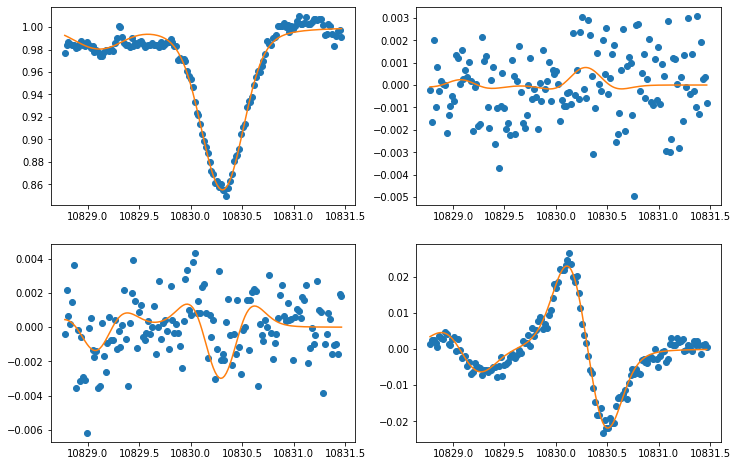

In [56]:
ll_fit = ll[l_l:l_r]

plt.figure(figsize=[12,8])
plt.subplot(221)
plt.plot(ll_fit,spectrum_to_fit[0,:],'o')
plt.plot(ll_fit,fit[0,0,:])
plt.subplot(222)
plt.plot(ll_fit,spectrum_to_fit[1,:],'o')
plt.plot(ll_fit,fit[0,1,:])
plt.subplot(223)
plt.plot(ll_fit,spectrum_to_fit[2,:],'o')
plt.plot(ll_fit,fit[0,2,:])
plt.subplot(224)
plt.plot(ll_fit,spectrum_to_fit[3,:],'o')
plt.plot(ll_fit,fit[0,3,:])

### Not bad, let's have a look at the parameters! 

In [57]:
# Inverted parameters:

# Print them neatly:
# Inverted parameters:

# Print them neatly:
print ("Bx= ",result['ch1']['Bx'][0,0,0],"+/- ",result['ch1']['Bx_err'][0,0])
print ("By= ",result['ch1']['By'][0,0,0],"+/- ",result['ch1']['By_err'][0,0])
print ("Bz= ",result['ch1']['Bz'][0,0,0],"+/- ",result['ch1']['Bz_err'][0,0])
print ("tau= ",result['ch1']['tau'][0,0,0],"+/- ",result['ch1']['tau_err'][0,0])
print ("vlos= ",result['ch1']['v'][0,0,0],"+/- ",result['ch1']['v_err'][0,0])
print ("vtherm= ",result['ch1']['deltav'][0,0,0],"+/- ",result['ch1']['deltav_err'][0,0])
print ("a= ",result['ch1']['a'][0,0,0],"+/- ",result['ch1']['a_err'][0,0])
result.close()

Bx=  -576.5639698249875 +/-  [0.30670537]
By=  -688.3999229577873 +/-  [0.77229471]
Bz=  834.0931223277407 +/-  [0.72101119]
tau=  0.26635598969286306 +/-  [0.33118279]
vlos=  0.027906383515784228 +/-  [0.05221856]
vtherm=  5.928001543586817 +/-  [2.02038766]
a=  0.2860909041899296 +/-  [4.25948154]


In [52]:
%rm output_onepixel.h5

## What can we change here?

## Show how to do multiple pixels at once!\

#### We prepare the data identically but we save it in a .h5 file

In [58]:
# Save the data for the inversion
# First the wavelength axis
np.savetxt('10830_gregor.wavelength', ll[l_l:l_r], header='lambda')

# Now the wavelength dependent weights
f = open('10830_gregor.weights', 'w')
f.write('# WeightI WeightQ WeightU WeightV\n')
for i in range(n_wvl):
    f.write('1.0    1.0   1.0   1.0\n')
f.close()

In [61]:
noise = 2E-3
i = 100
j = 100
x_range = 4
y_range = 4
# And the Stokes parameters
n_pixel = x_range*y_range

stokes_3d = cube[i:i+x_range,j:j+y_range,:,l_l:l_r] / cube[i:i+x_range,j:j+y_range,:,l_l,None]
stokes_3d = stokes_3d.reshape(x_range*y_range,4,n_wvl)
stokes_3d = stokes_3d.transpose(0,2,1)
sigma_3d = np.zeros((n_pixel,n_wvl,4), dtype=np.float64)
sigma_3d[:,:,:] = noise
los_3d = np.zeros((n_pixel,3), dtype=np.float64)
los_3d[:,0] = 0.0
los_3d[:,1] = 0.0
los_3d[:,2] = 0.0
boundary_3d = np.zeros((n_pixel,n_wvl,4), dtype=np.float64)
boundary_3d[:,:,0] = 1.0

f = h5py.File('pixels_to_invert.h5', 'w')
db_stokes = f.create_dataset('stokes', stokes_3d.shape, dtype=np.float64)
db_sigma = f.create_dataset('sigma', sigma_3d.shape, dtype=np.float64)
db_los = f.create_dataset('LOS', los_3d.shape, dtype=np.float64)
db_boundary = f.create_dataset('boundary', boundary_3d.shape, dtype=np.float64)
db_stokes[:] = stokes_3d
db_sigma[:] = sigma_3d
db_los[:] = los_3d
db_boundary[:] = boundary_3d
f.close()

## Investigating fully inverted map of He 10830

In [64]:
fitmap = h5py.File('../../Data/output_full_map_he_si.h5','r')

## Request this file separately

In [65]:
fitmap.keys()

<KeysViewHDF5 ['ch1', 'ph1', 'spec1']>

In [67]:
stokes = np.copy(fitmap['spec1']['stokes'])
stokes.shape

(109000, 1, 2, 4, 350)

In [73]:
stokes = stokes.reshape(436,250,2,4,350)
stokes.shape

(436, 250, 2, 4, 350)

In [74]:
ll_inv = np.copy(fitmap['spec1']['wavelength'])
ll_inv.shape

(350,)

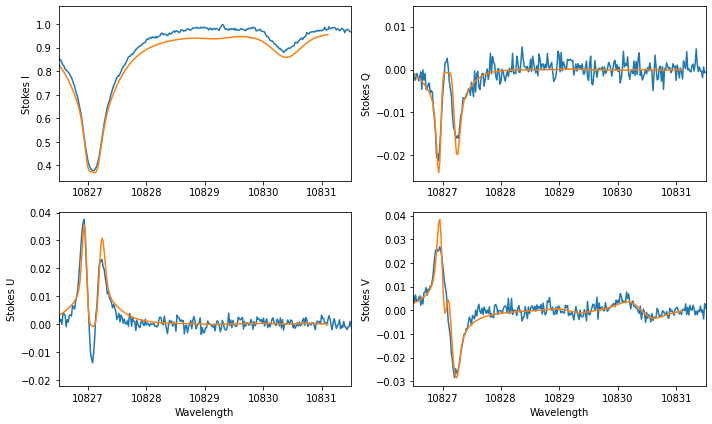

In [77]:
ll_l = 10826.5
ll_r = 10831.5
i = 100
j = 100
plt.figure(figsize=[10,6])
plt.subplot(221)
plt.plot(ll,cube[i,j,0])
plt.plot(ll_inv,stokes[i,j,1,0])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes I")
plt.subplot(222)
plt.plot(ll,cube[i,j,1])
plt.plot(ll_inv,stokes[i,j,1,1])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes Q")
plt.subplot(223)
plt.plot(ll,cube[i,j,2])
plt.plot(ll_inv,stokes[i,j,1,2])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes U")
plt.xlabel("Wavelength")
plt.subplot(224)
plt.plot(ll,cube[i,j,3])
plt.plot(ll_inv,stokes[i,j,1,3])
plt.xlim([ll_l,ll_r])
plt.ylabel("Stokes V")
plt.xlabel("Wavelength")
plt.tight_layout()


In [80]:
B_z_ch = np.copy(fitmap['ch1']['Bz'])

In [104]:
v_ch = np.copy(fitmap['ch1']['v'])
v_ch = v_ch.reshape(436,250,2)

In [81]:
B_z_ch.shape

(109000, 1, 2, 1)

In [82]:
B_z_ch = B_z_ch.reshape(436,250,2)

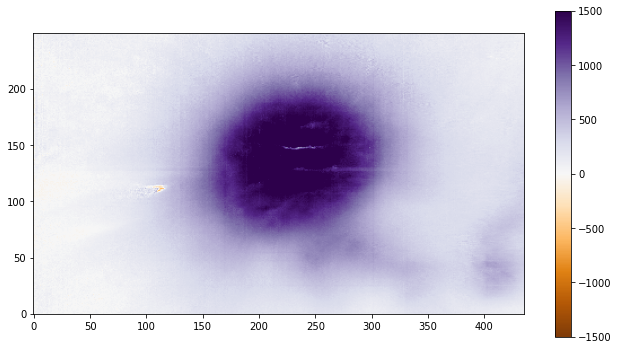

In [85]:
plt.figure(figsize=[11,6])
plt.imshow(B_z_ch[:,:,1].T,origin='lower',cmap='PuOr',vmin=-1500,vmax=1500)
plt.colorbar()

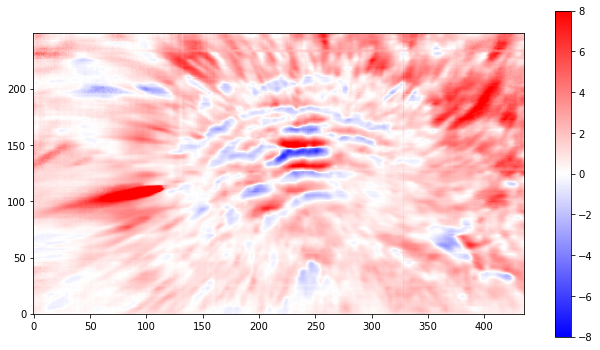

In [108]:
plt.figure(figsize=[11,6])
plt.imshow(v_ch[:,:,1].T,origin='lower',cmap='bwr',vmin=-8,vmax=8)
plt.colorbar()

In [86]:
B_z_ph = np.copy(fitmap['ph1']['Bz'])

In [87]:
B_z_ph.shape

(109000, 1, 2, 73)

In [94]:
B_z_ph = B_z_ph.reshape(436,250,2,73)

In [88]:
fitmap['ph1'].keys()

<KeysViewHDF5 ['Bx', 'Bx_err', 'Bx_nodes', 'By', 'By_err', 'By_nodes', 'Bz', 'Bz_err', 'Bz_nodes', 'T', 'T_err', 'T_nodes', 'ff', 'ff_err', 'ff_nodes', 'log_tau', 'v', 'v_err', 'v_nodes', 'vmac', 'vmac_err', 'vmac_nodes', 'vmic', 'vmic_err', 'vmic_nodes']>

In [91]:
logtau = np.squeeze(fitmap['ph1']['log_tau'])

In [92]:
print (logtau)

[ 1.2  1.1  1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1  0.  -0.1
 -0.2 -0.3 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9 -1.  -1.1 -1.2 -1.3 -1.4 -1.5
 -1.6 -1.7 -1.8 -1.9 -2.  -2.1 -2.2 -2.3 -2.4 -2.5 -2.6 -2.7 -2.8 -2.9
 -3.  -3.1 -3.2 -3.3 -3.4 -3.5 -3.6 -3.7 -3.8 -3.9 -4.  -4.1 -4.2 -4.3
 -4.4 -4.5 -4.6 -4.7 -4.8 -4.9 -5.  -5.1 -5.2 -5.3 -5.4 -5.5 -5.6 -5.7
 -5.8 -5.9 -6. ]


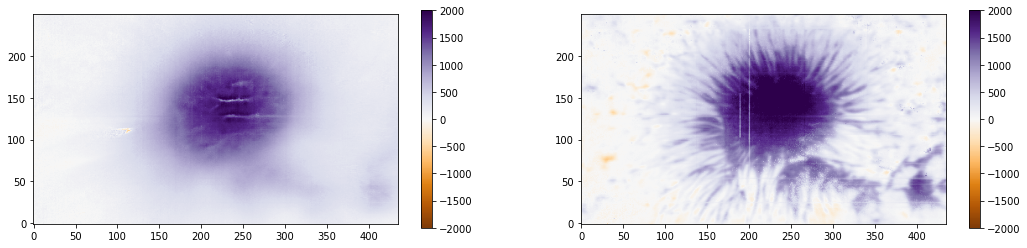

In [103]:
plt.figure(figsize=[18,4])
plt.subplot(121)
plt.imshow(B_z_ch[:,:,1].T,origin='lower',cmap='PuOr',vmin=-2000,vmax=2000)
plt.colorbar()
plt.subplot(122)
plt.imshow(B_z_ph[:,:,1,12].T,origin='lower',cmap='PuOr',vmin=-2000,vmax=2000)
plt.colorbar()